In [3]:
# The data incubator project by Maxime M. Ali-Dib

# Import libraries

from __future__ import absolute_import, division, print_function
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt

from keras.models import Model
from keras.layers.core import Dropout, Reshape
from keras.regularizers import l2

from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras import backend as K
K.set_image_dim_ordering('tf')
from PIL import Image
import matplotlib
from utils import *
import cv2
from keras import __version__ as keras_version
k2 = True if keras_version[0] == '2' else False
from keras.models import load_model

/home/mad/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [6]:
# The code I co-built and used can be found at: https://github.com/malidib/DeepMoon
# The data sources are linked in the github page.
# The model I used is based on the same UNET architecture found in the github, but not identical to the provided code.
# The main difference is that I reversed the input and target images. The CNN now reads a 
#   craters maks image and generate lunar landscapes based on that image. 

# I trained for 8 epochs on 30000 images generated following the procedure discussed in :
#  https://www.dropbox.com/s/fs43n9ashupoy01/AliDib_Craters.pdf?dl=0
# This took 6 hours on a P100 GPU.

# Load Pre-trained model (not provided)
model = load_model('./model_TDI.h5')

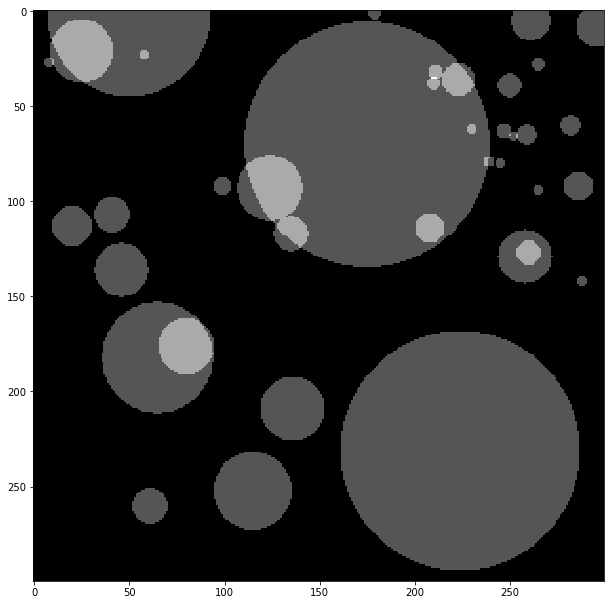

In [10]:
# Read the input image showing the craters mask
# The CNN will generate a lunar landscape with the craters distribution corresponding to the input mask.

im = cv2.imread("./lola_00995_mask.png", cv2.IMREAD_GRAYSCALE)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.imshow(im, cmap='binary_r')

plt.show()

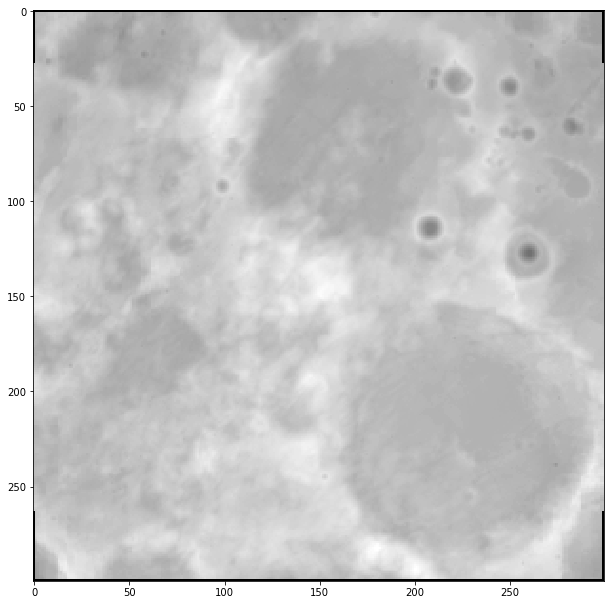

In [11]:
# Run the input image above through the model and show the CNN's output.
# The output is a Moon-like landscape based on the input that can be used for movies


im = np.array(im).astype('float32').reshape(1,dim,dim,1)

predictiontest = model.predict(im)


imoutput = np.array(predictiontest).astype('float32').reshape(dim,dim)
plt.imshow(imoutput, interpolation='bilinear', cmap='Greys')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()


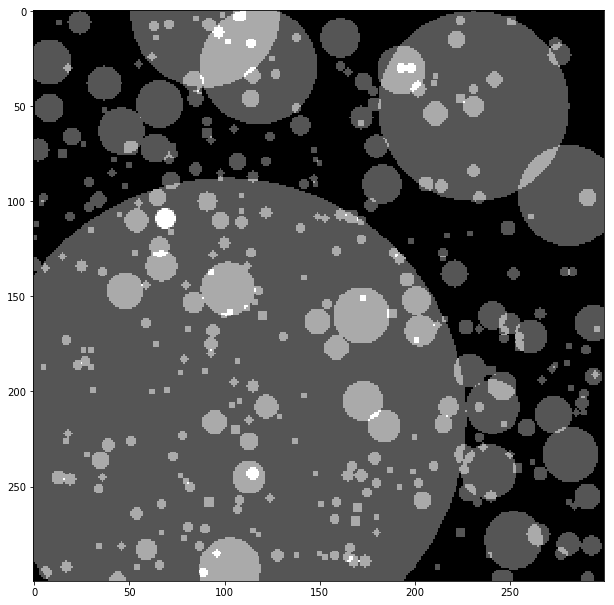

In [12]:
# Another example:

# Read the input image showing the the craters mask
# The CNN will generate a lunar landscape with the craters distribution corresponding to the input mask.

im = cv2.imread("./lola_00996_mask.png", cv2.IMREAD_GRAYSCALE)

fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.imshow(im, cmap='binary_r')

plt.show()


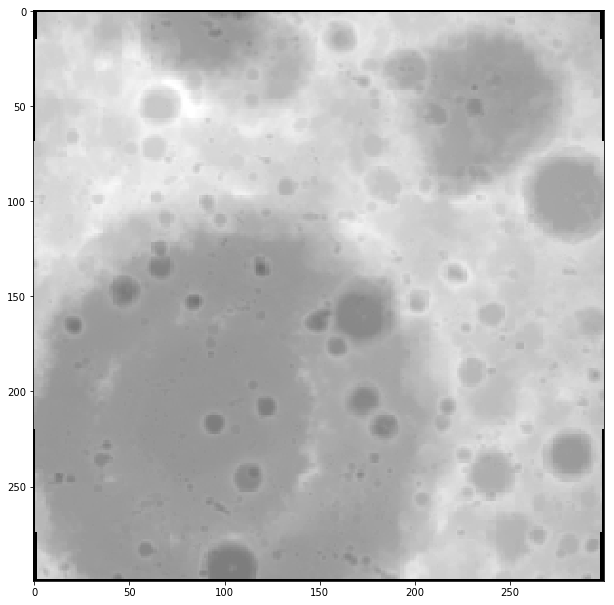

In [13]:
# Run the input image through the model and show the CNN's output.
# The output is a Moon-like landscape based on the input that can be used for movies

im = np.array(im).astype('float32').reshape(1,dim,dim,1)

predictiontest = model.predict(im)


imoutput = np.array(predictiontest).astype('float32').reshape(dim,dim)
plt.imshow(imoutput, interpolation='bilinear', cmap='Greys')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.show()
